# Exploratory Data Analysis

Importing neceassary libraries and reading the file

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('DATA_ML.csv', index_col=False)

In [3]:
end_date_max = df['END_DATE'].max()
end_date_max

'2024-07-12'

In [4]:
pd.set_option('display.max_columns', None)
del(df['Unnamed: 0'])
df.head()

,ID,DEVICE_ID,BRAND,MODEL,POST_RELEASE_PURCHASE,DAYS_USED,AVG_DAYS_USED,SUPPORTS_LTE,SUPPORTS_VOLTE,BAND_1800,BAND_1900,BAND_850,BAND_900,CAMERA_FLASHLIGHT,SUPPORTS_MULTISIM,SUPPORTS_ESIM,SUPPORT_5G,RAM_SIZE,SIM_COUNT,CPU_CORES,BATTERY_CAPACITY,BODY_DEPTH,BODY_HEIGHT,BODY_WIDTH,BODY_TYPE,PIXEL_DENSITY,START_DAY,START_MONTH,START_YEAR,END_DAY,END_MONTH,END_YEAR,RELEASE_DAY,RELEASE_MONTH,RELEASE_YEAR,OS_CODE,OS_TYPE_CODE,OS_VENDOR_CODE,BATTERY_TYPE_CODE,MULTISIM_MODE_CODE,BRAND_CODE,MODEL_CODE,NETTYPE_CODE,START_DATE,END_DATE,RELEASE_DATE
0,4397787,35230713,Samsung,Galaxy A12,1230,193,616.0,1,1,1,1,1,1,1,1,0,0,6156,2,8,5000.0,8.9,164.0,75.80,touch,264.0,1,1,2024,12,7,2024,19,8,2020,0,0,2,0,3,0.399493,0.008009,4,2024-01-01,2024-07-12,2020-08-19
1,4129638,35306809,Apple,iPhone SE,2222,425,642.5,1,0,1,1,1,1,1,0,0,0,2048,1,2,1642.0,7.6,123.8,58.60,touch,326.0,1,4,2022,31,5,2023,1,3,2016,24,0,0,0,2,0.211316,0.004705,4,2022-04-01,2023-05-31,2016-03-01
2,1154183,86887805,OnePlus,Nord N100,529,984,564.8,1,1,1,1,1,1,1,1,0,0,6156,2,8,5000.0,8.5,164.9,75.10,touch,269.0,1,11,2021,12,7,2024,21,5,2020,0,0,2,1,3,0.001140,0.000151,4,2021-11-01,2024-07-12,2020-05-21
3,670331,86296505,Xiaomi,Redmi 9T,120,1034,624.8,1,1,1,1,1,1,0,1,0,0,4096,2,8,6000.0,9.6,162.3,77.28,touch,395.0,1,5,2021,29,2,2024,1,1,2021,0,0,2,1,2,0.081583,0.001708,4,2021-05-01,2024-02-29,2021-01-01
4,3074468,35639208,Samsung,Galaxy J7 2017 Dual,1553,30,653.4,1,1,1,1,1,1,1,1,0,0,3072,2,8,3600.0,7.8,152.4,74.70,touch,401.0,1,10,2021,31,10,2021,1,7,2017,0,0,2,0,2,0.399493,0.003262,4,2021-10-01,2021-10-31,2017-07-01


Checking whether or not any customer purchased any 2 devices at the same date

In [5]:
duplicate_start_dates = df[df.duplicated(subset=['ID', 'DEVICE_ID', 'START_DATE'], keep=False)]
users_with_non_unique_start_dates = duplicate_start_dates['ID'].unique()

len(users_with_non_unique_start_dates)

0

Sorting values by user ID and START_DATE

In [6]:
sorted_df = df.sort_values(['ID',"START_DATE"])

In [7]:
sorted_df.head()

,ID,DEVICE_ID,BRAND,MODEL,POST_RELEASE_PURCHASE,DAYS_USED,AVG_DAYS_USED,SUPPORTS_LTE,SUPPORTS_VOLTE,BAND_1800,BAND_1900,BAND_850,BAND_900,CAMERA_FLASHLIGHT,SUPPORTS_MULTISIM,SUPPORTS_ESIM,SUPPORT_5G,RAM_SIZE,SIM_COUNT,CPU_CORES,BATTERY_CAPACITY,BODY_DEPTH,BODY_HEIGHT,BODY_WIDTH,BODY_TYPE,PIXEL_DENSITY,START_DAY,START_MONTH,START_YEAR,END_DAY,END_MONTH,END_YEAR,RELEASE_DAY,RELEASE_MONTH,RELEASE_YEAR,OS_CODE,OS_TYPE_CODE,OS_VENDOR_CODE,BATTERY_TYPE_CODE,MULTISIM_MODE_CODE,BRAND_CODE,MODEL_CODE,NETTYPE_CODE,START_DATE,END_DATE,RELEASE_DATE
4978529,1,1343900,Apple,iPhone 5,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400.0,7.6,123.8,58.6,touch,326.0,1,3,2016,31,5,2017,16,8,2012,24,0,0,1,2,0.211316,0.010954,3,2016-03-01,2017-05-31,2012-08-16
8167674,1,35579407,Apple,iPhone SE,457,882,642.5,1,0,1,1,1,1,1,0,0,0,2048,1,8,1642.0,7.6,123.8,58.6,touch,326.0,1,6,2017,31,10,2019,1,3,2016,24,0,0,0,2,0.211316,0.004705,4,2017-06-01,2019-10-31,2016-03-01
4643647,2,86545602,Alcatel,One Touch Pop C5 Dual,1127,910,531.1,0,0,1,1,1,1,1,1,0,0,512,2,8,1800.0,11.5,131.5,67.9,touch,218.0,1,1,2017,30,6,2019,1,12,2013,0,0,2,0,2,0.040123,0.001340,3,2017-01-01,2019-06-30,2013-12-01
10284868,2,35152604,Nokia,5235,2491,637,403.3,0,0,1,1,1,1,0,0,0,0,0,1,1,1320.0,15.5,111.0,51.7,touch,229.0,1,2,2017,31,10,2018,8,4,2010,19,0,9,0,2,0.040552,0.000028,3,2017-02-01,2018-10-31,2010-04-08
11168153,2,35930004,Nokia,Lumia 710,2618,89,444.1,0,0,1,1,1,1,1,0,0,0,512,1,8,1300.0,12.5,119.0,62.4,touch,252.0,1,12,2018,28,2,2019,1,10,2011,23,0,5,0,2,0.040552,0.000361,3,2018-12-01,2019-02-28,2011-10-01


Average Brand Usage Duration

In [8]:
temp = sorted_df.groupby('BRAND')['DAYS_USED'].mean()
days_by_brand = pd.DataFrame(temp)
days_by_brand = days_by_brand.sort_values('DAYS_USED',ascending=False)
days_by_brand.head(10)

,DAYS_USED
BRAND,
Motorola Solutions Inc,3489.428571
Vivatel Co Ltd,1918.000000
Shanghai Yike Communication Technology Co Ltd,1824.000000
Bluebank Communication Technology Co Ltd,1612.000000
Tibet Year Communications Technology Co Ltd,1460.000000
Shenzhen Youkelianxin Technology Ltd,1423.666667
Sichuan Sugar Communication Technology Co Ltd,1257.000000
Flame Group SE,1216.000000
Shenzhen Yoord Electrionics Technology Co Ltd,1155.500000


Calculating the total number of devices used per brand.

In [9]:
phones_per_brand = sorted_df.groupby('BRAND')['ID'].count().reset_index(name='TOTAL_COUNT')
phone_per_brand = pd.DataFrame(phones_per_brand)
phone_per_brand = phone_per_brand.sort_values('TOTAL_COUNT',ascending=False)
phone_per_brand.head(10)

,BRAND,TOTAL_COUNT
593,Samsung,4935522
36,Apple,2610699
928,Xiaomi,1007910
466,Nokia,500995
20,Alcatel,495699
299,Huawei,466542
207,Fly,225956
375,Lenovo,222061
265,HTC,162195
366,LG,161029


Merging dataframes & Renaming columns

In [10]:
summary_df = pd.merge(phone_per_brand, days_by_brand, on='BRAND', how='inner')
summary_df.rename(columns={'DAYS_USED': 'MEAN_DAYS_USED'}, inplace=True)
summary_df.rename(columns={'TOTAL_COUNT': 'PHONE_COUNT'}, inplace=True)
summary_df['MEAN_DAYS_USED'] = summary_df['MEAN_DAYS_USED'].round(2)
summary_df.head(10)

,BRAND,PHONE_COUNT,MEAN_DAYS_USED
0,Samsung,4935522,619.25
1,Apple,2610699,589.95
2,Xiaomi,1007910,584.61
3,Nokia,500995,429.94
4,Alcatel,495699,493.15
5,Huawei,466542,618.52
6,Fly,225956,410.33
7,Lenovo,222061,549.47
8,HTC,162195,481.32
9,LG,161029,562.83


Identifing and counting transitions between brands

In [13]:
temp = sorted_df
temp['NEXT_BRAND'] = temp.groupby('ID')['BRAND'].shift(-1)

temp = temp.dropna(subset=['NEXT_BRAND'])

temp['FROM_TO'] = temp['BRAND'] + ' to ' + temp['NEXT_BRAND']

brand_change_counts = temp.groupby(['FROM_TO']).size().reset_index(name='COUNT')

brand_change_counts[['FROM', 'TO']] = brand_change_counts['FROM_TO'].str.split(' to ', expand=True)

brand_change_df = brand_change_counts[['FROM', 'TO', 'COUNT']]

brand_change_df =  brand_change_df.sort_values('COUNT',ascending=False)

C:\Users\liana\AppData\Local\Temp\ipykernel_7336\4244498466.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['FROM_TO'] = temp['BRAND'] + ' to ' + temp['NEXT_BRAND']


In [14]:
brand_change_df['CHANGE'] = brand_change_df['FROM'] + ' to ' + brand_change_df['TO']

In [15]:
brand_change_df = brand_change_df.sort_values('COUNT',ascending=False)
brand_change_df.head(15)

,FROM,TO,COUNT,CHANGE
18108,Samsung,Samsung,1768321,Samsung to Samsung
1139,Apple,Apple,847020,Apple to Apple
17701,Samsung,Apple,685760,Samsung to Apple
1514,Apple,Samsung,542005,Apple to Samsung
18337,Samsung,Xiaomi,373413,Samsung to Xiaomi
24440,Xiaomi,Samsung,206241,Xiaomi to Samsung
682,Alcatel,Samsung,189498,Alcatel to Samsung
15288,Nokia,Samsung,175783,Nokia to Samsung
9802,Huawei,Samsung,152555,Huawei to Samsung
17901,Samsung,Huawei,142411,Samsung to Huawei


Data showing changing the device from 'Apple' to other brands

In [16]:
brand_change_df[brand_change_df['FROM'] == 'Apple'].head(8)

,FROM,TO,COUNT,CHANGE
1139,Apple,Apple,847020,Apple to Apple
1514,Apple,Samsung,542005,Apple to Samsung
1689,Apple,Xiaomi,126244,Apple to Xiaomi
1319,Apple,Huawei,59428,Apple to Huawei
1129,Apple,Alcatel,27764,Apple to Alcatel
1433,Apple,Nokia,26662,Apple to Nokia
1377,Apple,Lenovo,15942,Apple to Lenovo
1369,Apple,LG,12883,Apple to LG


Bar plot visualizing chnages from one brand to another

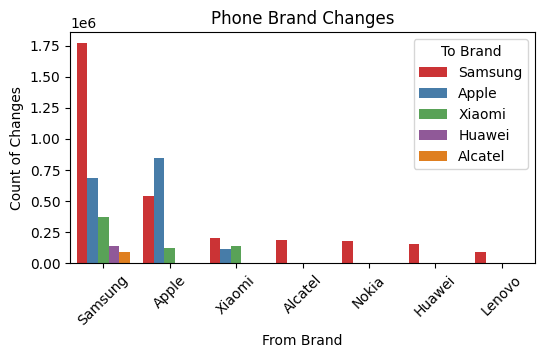

In [17]:
plt.figure(figsize=(6, 3))
sns.set_palette("Set1")
sns.barplot(data=brand_change_df.head(15), x='FROM', y='COUNT', hue='TO')
plt.title('Phone Brand Changes')
plt.xlabel('From Brand') 
plt.ylabel('Count of Changes')
plt.xticks(rotation=45)
plt.legend(title='To Brand') 
plt.show()


Deleting the column 'NEXT_BRAND'

In [18]:
sorted_df= sorted_df.drop('NEXT_BRAND', axis=1)


In [19]:
sorted_df.head(12)

,ID,DEVICE_ID,BRAND,MODEL,POST_RELEASE_PURCHASE,DAYS_USED,AVG_DAYS_USED,SUPPORTS_LTE,SUPPORTS_VOLTE,BAND_1800,BAND_1900,BAND_850,BAND_900,CAMERA_FLASHLIGHT,SUPPORTS_MULTISIM,SUPPORTS_ESIM,SUPPORT_5G,RAM_SIZE,SIM_COUNT,CPU_CORES,BATTERY_CAPACITY,BODY_DEPTH,BODY_HEIGHT,BODY_WIDTH,BODY_TYPE,PIXEL_DENSITY,START_DAY,START_MONTH,START_YEAR,END_DAY,END_MONTH,END_YEAR,RELEASE_DAY,RELEASE_MONTH,RELEASE_YEAR,OS_CODE,OS_TYPE_CODE,OS_VENDOR_CODE,BATTERY_TYPE_CODE,MULTISIM_MODE_CODE,BRAND_CODE,MODEL_CODE,NETTYPE_CODE,START_DATE,END_DATE,RELEASE_DATE
4978529,1,1343900,Apple,iPhone 5,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400.0,7.60,123.80,58.60,touch,326.00,1,3,2016,31,5,2017,16,8,2012,24,0,0,1,2,0.211316,0.010954,3,2016-03-01,2017-05-31,2012-08-16
8167674,1,35579407,Apple,iPhone SE,457,882,642.5,1,0,1,1,1,1,1,0,0,0,2048,1,8,1642.0,7.60,123.80,58.60,touch,326.00,1,6,2017,31,10,2019,1,3,2016,24,0,0,0,2,0.211316,0.004705,4,2017-06-01,2019-10-31,2016-03-01
4643647,2,86545602,Alcatel,One Touch Pop C5 Dual,1127,910,531.1,0,0,1,1,1,1,1,1,0,0,512,2,8,1800.0,11.50,131.50,67.90,touch,218.00,1,1,2017,30,6,2019,1,12,2013,0,0,2,0,2,0.040123,0.001340,3,2017-01-01,2019-06-30,2013-12-01
10284868,2,35152604,Nokia,5235,2491,637,403.3,0,0,1,1,1,1,0,0,0,0,0,1,1,1320.0,15.50,111.00,51.70,touch,229.00,1,2,2017,31,10,2018,8,4,2010,19,0,9,0,2,0.040552,0.000028,3,2017-02-01,2018-10-31,2010-04-08
11168153,2,35930004,Nokia,Lumia 710,2618,89,444.1,0,0,1,1,1,1,1,0,0,0,512,1,8,1300.0,12.50,119.00,62.40,touch,252.00,1,12,2018,28,2,2019,1,10,2011,23,0,5,0,2,0.040552,0.000361,3,2018-12-01,2019-02-28,2011-10-01
2921078,2,86230503,Xiaomi,Redmi Note 3 Pro,1351,183,570.9,1,1,1,1,1,1,1,1,0,0,3072,2,8,4000.0,8.65,150.00,76.00,touch,401.00,1,7,2019,31,12,2019,19,10,2015,0,0,2,1,2,0.081583,0.000249,4,2019-07-01,2019-12-31,2015-10-19
492386,2,91145725,Micromax,Q333,1665,30,412.0,0,0,1,0,0,1,1,1,0,0,512,2,4,1700.0,10.40,136.00,67.00,touch,338.94,1,1,2020,31,1,2020,11,6,2015,0,0,2,0,2,0.012696,0.000685,3,2020-01-01,2020-01-31,2015-06-11
6690185,2,35159811,Samsung,Galaxy A30s Dual,255,150,749.2,1,1,1,1,1,1,1,1,0,0,4096,2,8,4000.0,7.80,158.50,74.70,touch,268.00,1,2,2020,30,6,2020,22,5,2019,0,0,2,1,3,0.399493,0.003900,4,2020-02-01,2020-06-30,2019-05-22
12349245,2,35421610,Nokia,2.2,540,668,523.1,1,1,1,1,1,1,1,1,0,0,2048,2,4,3000.0,9.30,145.96,70.56,touch,295.00,1,7,2020,30,4,2022,8,1,2019,0,0,2,1,3,0.040552,0.000454,4,2020-07-01,2022-04-30,2019-01-08
11954173,2,35542396,Samsung,Galaxy A12,577,578,616.0,1,1,1,1,1,1,1,0,0,0,3072,1,8,5000.0,8.90,164.00,75.80,touch,270.00,1,5,2022,30,11,2023,1,10,2020,0,0,2,0,2,0.399493,0.008009,4,2022-05-01,2023-11-30,2020-10-01


Normalizing the frequency of each 'OS_CODE' & mapping these frequencies back to the 'OS_CODE' column

In [20]:
frequency_map = sorted_df['OS_CODE'].value_counts(normalize=True)

sorted_df['OS_CODE'] = sorted_df['OS_CODE'].map(frequency_map)

In [21]:
sorted_df.head()

,ID,DEVICE_ID,BRAND,MODEL,POST_RELEASE_PURCHASE,DAYS_USED,AVG_DAYS_USED,SUPPORTS_LTE,SUPPORTS_VOLTE,BAND_1800,BAND_1900,BAND_850,BAND_900,CAMERA_FLASHLIGHT,SUPPORTS_MULTISIM,SUPPORTS_ESIM,SUPPORT_5G,RAM_SIZE,SIM_COUNT,CPU_CORES,BATTERY_CAPACITY,BODY_DEPTH,BODY_HEIGHT,BODY_WIDTH,BODY_TYPE,PIXEL_DENSITY,START_DAY,START_MONTH,START_YEAR,END_DAY,END_MONTH,END_YEAR,RELEASE_DAY,RELEASE_MONTH,RELEASE_YEAR,OS_CODE,OS_TYPE_CODE,OS_VENDOR_CODE,BATTERY_TYPE_CODE,MULTISIM_MODE_CODE,BRAND_CODE,MODEL_CODE,NETTYPE_CODE,START_DATE,END_DATE,RELEASE_DATE
4978529,1,1343900,Apple,iPhone 5,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400.0,7.6,123.8,58.6,touch,326.0,1,3,2016,31,5,2017,16,8,2012,0.211316,0,0,1,2,0.211316,0.010954,3,2016-03-01,2017-05-31,2012-08-16
8167674,1,35579407,Apple,iPhone SE,457,882,642.5,1,0,1,1,1,1,1,0,0,0,2048,1,8,1642.0,7.6,123.8,58.6,touch,326.0,1,6,2017,31,10,2019,1,3,2016,0.211316,0,0,0,2,0.211316,0.004705,4,2017-06-01,2019-10-31,2016-03-01
4643647,2,86545602,Alcatel,One Touch Pop C5 Dual,1127,910,531.1,0,0,1,1,1,1,1,1,0,0,512,2,8,1800.0,11.5,131.5,67.9,touch,218.0,1,1,2017,30,6,2019,1,12,2013,0.741953,0,2,0,2,0.040123,0.001340,3,2017-01-01,2019-06-30,2013-12-01
10284868,2,35152604,Nokia,5235,2491,637,403.3,0,0,1,1,1,1,0,0,0,0,0,1,1,1320.0,15.5,111.0,51.7,touch,229.0,1,2,2017,31,10,2018,8,4,2010,0.022345,0,9,0,2,0.040552,0.000028,3,2017-02-01,2018-10-31,2010-04-08
11168153,2,35930004,Nokia,Lumia 710,2618,89,444.1,0,0,1,1,1,1,1,0,0,0,512,1,8,1300.0,12.5,119.0,62.4,touch,252.0,1,12,2018,28,2,2019,1,10,2011,0.010124,0,5,0,2,0.040552,0.000361,3,2018-12-01,2019-02-28,2011-10-01


Droping columns

In [22]:
sorted_df = sorted_df.drop(['BRAND', 'MODEL'], axis=1)

In [23]:
sorted_df['BODY_TYPE'].value_counts()

BODY_TYPE
touch        12180550
classic        121284
slider          39455
clamshell       11549
other            1194
swivel            442
Name: count, dtype: int64

Normalizing the frequency of each 'BODY_TYPE' & mapping these frequencies back to the 'BODY_TYPE' column

In [24]:
frequency_map2 = sorted_df['BODY_TYPE'].value_counts(normalize=True)

sorted_df['BODY_TYPE'] = sorted_df['BODY_TYPE'].map(frequency_map2)

In [25]:
# sorted_df = sorted_df.drop(['START_DATE', 'END_DATE','RELEASE_DATE'], axis=1)

Normalizing the frequency of each 'OS_VENDOR_CODE' & mapping these frequencies back to the 'OS_VENDOR_CODE' column

In [26]:
frequency_map3 = sorted_df['OS_VENDOR_CODE'].value_counts(normalize=True)

sorted_df['OS_VENDOR_CODE'] = sorted_df['OS_VENDOR_CODE'].map(frequency_map3)

Create a new column 'IS_CHANGED' that flags whether 'END_DATE' is not null and before the current date.

In [27]:
current_date = end_date_max

sorted_df['IS_CHANGED'] = sorted_df['END_DATE'].apply(lambda x: 1 if pd.notna(x) and x < current_date else 0)

In [28]:
sorted_df[sorted_df['IS_CHANGED'] == 0].head()

,ID,DEVICE_ID,POST_RELEASE_PURCHASE,DAYS_USED,AVG_DAYS_USED,SUPPORTS_LTE,SUPPORTS_VOLTE,BAND_1800,BAND_1900,BAND_850,BAND_900,CAMERA_FLASHLIGHT,SUPPORTS_MULTISIM,SUPPORTS_ESIM,SUPPORT_5G,RAM_SIZE,SIM_COUNT,CPU_CORES,BATTERY_CAPACITY,BODY_DEPTH,BODY_HEIGHT,BODY_WIDTH,BODY_TYPE,PIXEL_DENSITY,START_DAY,START_MONTH,START_YEAR,END_DAY,END_MONTH,END_YEAR,RELEASE_DAY,RELEASE_MONTH,RELEASE_YEAR,OS_CODE,OS_TYPE_CODE,OS_VENDOR_CODE,BATTERY_TYPE_CODE,MULTISIM_MODE_CODE,BRAND_CODE,MODEL_CODE,NETTYPE_CODE,START_DATE,END_DATE,RELEASE_DATE,IS_CHANGED
6428652,2,86221906,362,193,226.1,1,1,1,1,1,1,0,1,0,0,4096,2,8,5000.00,8.17,168.60,76.28,0.985922,396.00,1,1,2024,12,7,2024,4,1,2023,0.741953,0,0.742367,0,3,0.081583,0.000582,4,2024-01-01,2024-07-12,2023-01-04,0
19081,5,86095705,1217,346,645.2,1,1,1,1,1,1,1,1,0,0,3072,2,8,5020.00,9.10,163.32,77.01,0.985922,395.00,1,8,2023,12,7,2024,1,4,2020,0.741953,0,0.742367,0,2,0.081583,0.003526,4,2023-08-01,2024-07-12,2020-04-01,0
1244379,6,86252506,762,680,559.1,1,1,1,1,1,1,1,1,0,0,2048,2,8,5000.00,9.00,164.90,77.00,0.985922,269.00,1,9,2022,12,7,2024,31,7,2020,0.741953,0,0.742367,1,3,0.081583,0.001114,4,2022-09-01,2024-07-12,2020-07-31,0
1811256,7,35657309,2281,468,730.3,1,0,1,1,1,1,1,0,0,0,2048,1,8,2350.00,7.90,135.40,66.20,0.985922,312.00,1,4,2023,12,7,2024,1,1,2017,0.741953,0,0.742367,0,2,0.399493,0.000980,4,2023-04-01,2024-07-12,2017-01-01,0
11783968,8,35910885,524,72,189.6,1,1,1,1,1,1,0,1,0,0,4096,2,8,3257.14,9.00,147.80,71.88,0.985922,338.94,1,5,2024,12,7,2024,24,11,2022,0.741953,0,0.742367,0,2,0.000220,0.000006,4,2024-05-01,2024-07-12,2022-11-24,0


Dropping a column

In [29]:
sorted_df = sorted_df.drop(['OS_VENDOR_CODE'], axis=1)

In [30]:
sorted_df['BATTERY_CAPACITY'] = sorted_df['BATTERY_CAPACITY'].astype(int)

In [31]:
sorted_df['PIXEL_DENSITY'] = sorted_df['PIXEL_DENSITY'].astype(int)

In [32]:
sorted_df['OS_TYPE_CODE'].value_counts()

OS_TYPE_CODE
0    12354474
Name: count, dtype: int64

Dropping a column

In [33]:
sorted_df = sorted_df.drop('OS_TYPE_CODE', axis=1)

In [34]:
sorted_df['MULTISIM_MODE_CODE'].value_counts()

MULTISIM_MODE_CODE
2    9213465
3    2544802
1     461651
0     134556
Name: count, dtype: int64

In [35]:
sorted_df.head()

,ID,DEVICE_ID,POST_RELEASE_PURCHASE,DAYS_USED,AVG_DAYS_USED,SUPPORTS_LTE,SUPPORTS_VOLTE,BAND_1800,BAND_1900,BAND_850,BAND_900,CAMERA_FLASHLIGHT,SUPPORTS_MULTISIM,SUPPORTS_ESIM,SUPPORT_5G,RAM_SIZE,SIM_COUNT,CPU_CORES,BATTERY_CAPACITY,BODY_DEPTH,BODY_HEIGHT,BODY_WIDTH,BODY_TYPE,PIXEL_DENSITY,START_DAY,START_MONTH,START_YEAR,END_DAY,END_MONTH,END_YEAR,RELEASE_DAY,RELEASE_MONTH,RELEASE_YEAR,OS_CODE,BATTERY_TYPE_CODE,MULTISIM_MODE_CODE,BRAND_CODE,MODEL_CODE,NETTYPE_CODE,START_DATE,END_DATE,RELEASE_DATE,IS_CHANGED
4978529,1,1343900,1293,456,551.2,1,0,1,1,1,1,1,0,0,0,1024,1,8,1400,7.6,123.8,58.6,0.985922,326,1,3,2016,31,5,2017,16,8,2012,0.211316,1,2,0.211316,0.010954,3,2016-03-01,2017-05-31,2012-08-16,1
8167674,1,35579407,457,882,642.5,1,0,1,1,1,1,1,0,0,0,2048,1,8,1642,7.6,123.8,58.6,0.985922,326,1,6,2017,31,10,2019,1,3,2016,0.211316,0,2,0.211316,0.004705,4,2017-06-01,2019-10-31,2016-03-01,1
4643647,2,86545602,1127,910,531.1,0,0,1,1,1,1,1,1,0,0,512,2,8,1800,11.5,131.5,67.9,0.985922,218,1,1,2017,30,6,2019,1,12,2013,0.741953,0,2,0.040123,0.001340,3,2017-01-01,2019-06-30,2013-12-01,1
10284868,2,35152604,2491,637,403.3,0,0,1,1,1,1,0,0,0,0,0,1,1,1320,15.5,111.0,51.7,0.985922,229,1,2,2017,31,10,2018,8,4,2010,0.022345,0,2,0.040552,0.000028,3,2017-02-01,2018-10-31,2010-04-08,1
11168153,2,35930004,2618,89,444.1,0,0,1,1,1,1,1,0,0,0,512,1,8,1300,12.5,119.0,62.4,0.985922,252,1,12,2018,28,2,2019,1,10,2011,0.010124,0,2,0.040552,0.000361,3,2018-12-01,2019-02-28,2011-10-01,1
